# Trabajo Práctico 1
Manipular independientemente la luminancia y la saturación de una imagen transformando cualquier imagen desde el espacio RGB al YIQ. Luego alterar los valores de Y (luminancia) o de IQ (saturación).



In [12]:
import imageio
import matplotlib.pyplot as plt
import numpy as np

Genero una función que transforma la imagen desde el espacio RGB al YIQ.

In [2]:
def RGB_to_YIQ(rgb):
   yiq = np.zeros(rgb.shape)
   yiq[:,:,0] = 0.299*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2]
   yiq[:,:,1] = 0.595716*rgb[:,:,0] - 0.274453*rgb[:,:,1] - 0.321263*rgb[:,:,2]
   yiq[:,:,2] = 0.211456*rgb[:,:,0] - 0.522591*rgb[:,:,1] + 0.311135*rgb[:,:,2]
   return yiq

Genero una función que transforma la imagen desde el espacio YIQ al RGB.

In [3]:
def YIQ_to_RGB(yiq):
  rgb = np.zeros(yiq.shape)
  rgb[:,:,0] = yiq[:,:,0] + 0.9663*yiq[:,:,1] + 0.6210*yiq[:,:,2]
  rgb[:,:,1] = yiq[:,:,0] - 0.2721*yiq[:,:,1] - 0.6474*yiq[:,:,2]
  rgb[:,:,2] = yiq[:,:,0] - 1.1070*yiq[:,:,1] + 1.7046*yiq[:,:,2]
  return rgb

Genero una función para modificar las luminancias en mi imagen transformada.

In [4]:
def brillo(yiq, a=0):
    yiq2 = np.zeros(yiq.shape)
    yiq2[:,:,:] = yiq[:,:,:]
    if a>0:
        yiq2[:,:,0] = yiq[:,:,0]*(1-a)+a
    else:
        yiq2[:,:,0] = yiq[:,:,0]*(1+a)
    return yiq2

# Bloque principal del programa.
Leo la imagen original en RGB y la normalizo, luego convierto esa matriz normalizada al espacio YIQ.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 451, 3)
float64


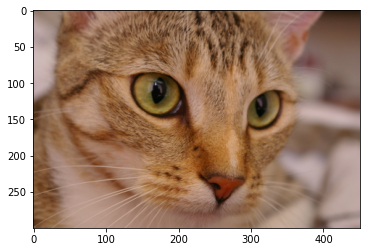

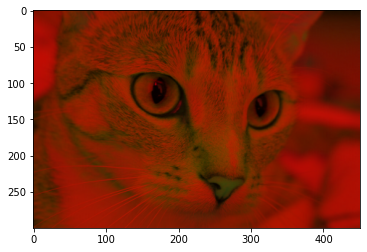

In [9]:
from google.colab import files


rgb=imageio.imread('imageio:chelsea.png')/255.
print(rgb.shape) #muestro el tamaño
print(rgb.dtype) #muestro el tipo de datos

yiq=RGB_to_YIQ(rgb)

plt.figure(0)
plt.imshow(rgb)
plt.figure(1)
plt.imshow(yiq)

Muestro los valores máximos y mínimos de la matriz RGB e YIQ.

In [10]:
print(yiq.max()) 
print(yiq.min())
print(rgb.max())
print(rgb.min())

0.7613882352941176
-0.10000386666666666
0.9058823529411765
0.0


Comparo la imagen RGB original con la RGB luego de modificar la luminancia. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


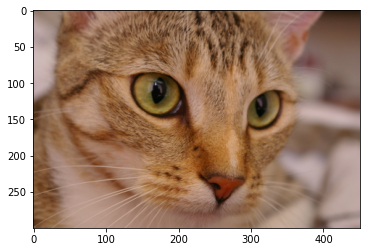

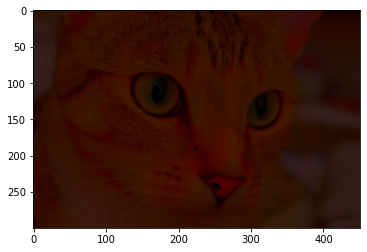

In [11]:
rgb2=YIQ_to_RGB(brillo(yiq,-0.8))
plt.figure(0)
plt.imshow(rgb)
plt.figure(1)
plt.imshow(rgb2)